In [65]:
# 물체 검출모델
# R-CNN
# Fast R-CNN
# Faster R-CNN
# YOLO(You Only Look Once)

In [66]:
# YOLO
import numpy as np
import cv2
# openCV 컴퓨터 비전 라이브러리   

In [67]:
classes = []
with open('/content/drive/MyDrive/Colab Notebooks/coco.names.txt','r') as f:
  classes = [line.strip() for line in f.readlines()]

In [68]:
colors = np.random.uniform(0,255,size=(len(classes),3))

In [69]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/yolo_test.jpg')

In [70]:
height,width,channels =  img.shape

In [71]:
blob = cv2.dnn.blobFromImage(img,1.0/255,(448,448),(0,0,0),swapRB=True,crop=False)

In [72]:
w = '/content/drive/MyDrive/Colab Notebooks/yolov3.weights'
c = '/content/drive/MyDrive/Colab Notebooks/yolov3.cfg'
yolo_model =  cv2.dnn.readNet(w,c)

In [73]:
layer_names =  yolo_model.getLayerNames()

In [74]:
out_layers = [layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers()]

In [75]:
# 테스트 영상을 신경망에  입력
yolo_model.setInput(blob)

In [76]:
outputs= yolo_model.forward(out_layers)

In [77]:
class_ids,confidences,boxes=[],[],[]

In [78]:
# 확률이 0.5를 넘는 바운딩 박스를 생성하고 모음
for output in outputs:
    for vec85 in output:
        scores=vec85[5:]
        class_id=np.argmax(scores)
        confidence=scores[class_id]
        if confidence>0.5: # 신뢰도가 50% 이상인 경우만 취함
            centerx,centery=int(vec85[0]*width),int(vec85[1]*height)  # [0,1] 표현을 영상 크기로 변환
            w,h=int(vec85[2]*width),int(vec85[3]*height)
            x,y=int(centerx-w/2),int(centery-h/2)
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [79]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)  #분류된것중에 최대인 것만 남김

In [80]:
# 살아남은 바운딩 박스를 영상에 표시
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h=boxes[i]
        text=str(classes[class_ids[i]])+'%.3f'%confidences[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),colors[class_ids[i]],2)
        cv2.putText(img,text,(x,y+30),cv2.FONT_HERSHEY_PLAIN,2,colors[class_ids[i]],2) 

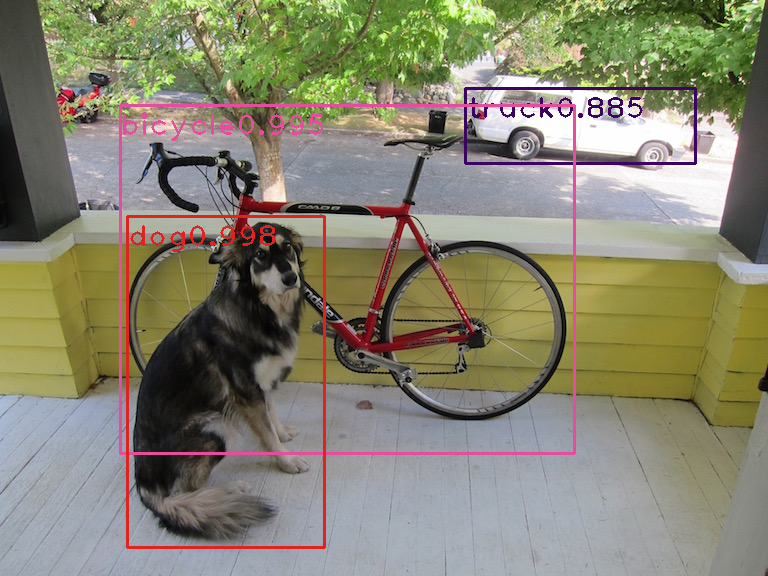

In [81]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [82]:
confidences

[0.8497058749198914,
 0.8852549195289612,
 0.8815889954566956,
 0.9826942682266235,
 0.9951439499855042,
 0.757009744644165,
 0.9577694535255432,
 0.9872122406959534,
 0.9908885359764099,
 0.9943508505821228,
 0.9973013997077942,
 0.9980911612510681]